In [23]:
import pandas as pd
import numpy as np

%matplotlib inline

### Importing and reformatting the data we are working with

In [35]:
#Non-traffic Citations
pgh_citations = pd.read_csv("https://data.wprdc.org/datastore/dump/6b11e87d-1216-463d-bbd3-37460e539d86",
                                index_col="CITEDTIME",
                                parse_dates=True)

pop_data = pd.read_csv('total-population.csv', index_col="Neighborhood")

#Reformat

pgh_citations = pgh_citations.rename(columns={'NEIGHBORHOOD':'Neighborhood', 'OFFENSES':'Citations'})
citation_data = pgh_citations.loc[:,["Citations","Neighborhood"]].groupby('Neighborhood').count()
citation_data.head()

,Citations
Neighborhood,
Allegheny Center,117
Allegheny West,12
Allentown,91
Arlington,37
Arlington Heights,5


### Adding population & Citations per Capita
If we only look at the number of citations, we completely ignore the fact that **more people = more crime**. Thus, we will look at the ratio of crime to people. We add the population onto our data frame, and, from here, we divide the number of citations by the estimated population to get the number of citations per person in the neighborhood.

In [36]:
population = pop_data.loc[:,"Estimate; Total"]
citation_data['Estimated Population'] = population
citation_data['Citations per Capita'] = citation_data.loc[:,"Citations"]/citation_data.loc[:,'Estimated Population']
citation_data.dropna()
citation_data.head()

,Citations,Estimated Population,Citations per Capita
Neighborhood,,,
Allegheny Center,117,1411.0,0.082920
Allegheny West,12,343.0,0.034985
Allentown,91,2558.0,0.035575
Arlington,37,1852.0,0.019978
Arlington Heights,5,272.0,0.018382


### Filter
To make plotting nicer (**actually readable**), we drop all neighborhoods with more than 5 citations per 1000 people.

In [44]:
citation_data_filtered = citation_data[citation_data['Citations per Capita']<.005].sort_values('Citations per Capita')
citation_data_filtered

,Citations,Estimated Population,Citations per Capita
Neighborhood,,,
Stanton Heights,8,4761.0,0.001680
Duquesne Heights,5,2522.0,0.001983
Swisshelm Park,4,1345.0,0.002974
Ridgemont,1,314.0,0.003185
Highland Park,25,6810.0,0.003671
St. Clair,1,270.0,0.003704
Oakwood,4,1058.0,0.003781
Banksville,16,3858.0,0.004147
Summer Hill,5,1191.0,0.004198


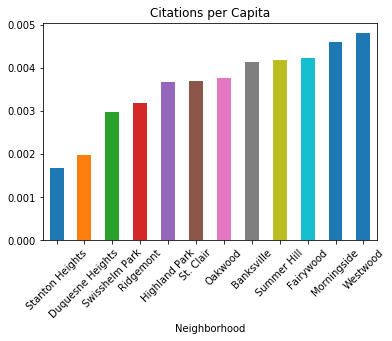

In [45]:
citation_data_filtered.loc[:,'Citations per Capita'].plot(kind="bar", title = "Citations per Capita", rot=45)